# Домашнее задание 5

## Задание

Получить на CIFAR-10 предсказание с верностью (`np.mean(y_pred == y_test)`) больше, чем **0.4**.

Разрешается менять почти любым образом и часть с обработкой картинок (можете извлекать любые признаки из картинок, даже те, которых не было на парах) и часть с машинным обучением, т.е. изменять алгоритм или его параметры, КРОМЕ сверточных нейронных сетей и их производных.

Таким образом, можно всегда запускать примерно так:

```
def MY_SUPER_FEATURE_EXTRACTOR(X):
  return X.copy()

# часть с извлечением признаков
my_X_train = MY_SUPER_FEATURE_EXTRACTOR(X_train)
my_X_test = MY_SUPER_FEATURE_EXTRACTOR(X_test)

# часть с машинным обучением
clf = KNeighborsClassifier(n_neighbors=1)
clf.fit(my_X_train, y_train)
y_pred = clf.predict(my_X_test)
print(np.mean(y_pred == y_test))
```

*Подсказка:* картинок много, лучше сначала проверять на небольшом количестве данных, а только потом запускать на всех. 

Нужна воспроизводимость. Возможно, у модели нужно будет выставить `random_state`. Перед отправкой ноутбука, можете убрать всё лишнее и перезапустить его:

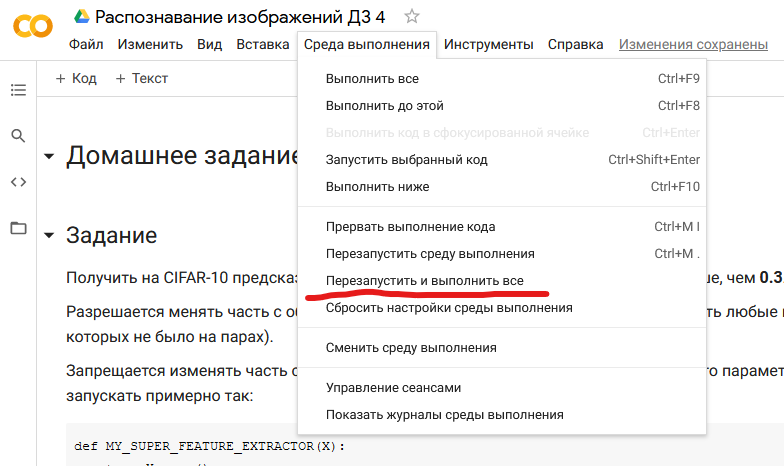

### Скачивание данных:

In [ ]:
import numpy as np
from imageio import imread
from scipy import ndimage
import cv2
import matplotlib.pyplot as plt
import skimage
from skimage import data
import numpy as np
from skimage.color import rgb2gray 
import scipy as sp
from pprint import pprint
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pylab as plt
from skimage.io import imread
from skimage.color import rgb2gray
from skimage import filters
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier

In [ ]:
!wget https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz
!tar -xvzf cifar-10-python.tar.gz

# https://www.cs.toronto.edu/~kriz/cifar.html

def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

Xs = []
ys = []
for f in ['cifar-10-batches-py/data_batch_1', 'cifar-10-batches-py/data_batch_2', 'cifar-10-batches-py/data_batch_3', 'cifar-10-batches-py/data_batch_4', 'cifar-10-batches-py/data_batch_5']:
  data = unpickle(f)
  Xs.append(data[b'data'])
  ys += data[b'labels']

X = np.vstack(Xs)
y = np.array(ys)

print(X.shape)
print(y.shape)

border = 40000
X_train, X_test = X[:border], X[border:]
y_train, y_test = y[:border], y[border:] 

--2020-12-07 21:30:45--  https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz
Resolving www.cs.toronto.edu (www.cs.toronto.edu)... 128.100.3.30
Connecting to www.cs.toronto.edu (www.cs.toronto.edu)|128.100.3.30|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 170498071 (163M) [application/x-gzip]
Saving to: ‘cifar-10-python.tar.gz’

cifar-10-python.tar 100%[===================>] 162.60M  95.3MB/s    in 1.7s    

2020-12-07 21:30:47 (95.3 MB/s) - ‘cifar-10-python.tar.gz’ saved [170498071/170498071]

cifar-10-batches-py/
cifar-10-batches-py/data_batch_4
cifar-10-batches-py/readme.html
cifar-10-batches-py/test_batch
cifar-10-batches-py/data_batch_3
cifar-10-batches-py/batches.meta
cifar-10-batches-py/data_batch_2
cifar-10-batches-py/data_batch_5
cifar-10-batches-py/data_batch_1
(50000, 3072)
(50000,)


In [ ]:
def get_edges_one_image(image):
  img = np.uint8(np.mean(image.reshape(3,32,32),axis=0))
  edges = cv2.Canny(img,100,180)
  edges_x = filters.sobel_h(img) 
  edges_y = filters.sobel_v(img)
  edges_all = filters.sobel(img)
  
  return np.stack([img, edges, edges_x, edges_y, edges_all]).flatten()

def get_edges(X):
  return list(map(get_edges_one_image, X))


def MY_SUPER_FEATURE_EXTRACTOR(X):
  return get_edges(X)

my_X_train = MY_SUPER_FEATURE_EXTRACTOR(X_train)
my_X_test = MY_SUPER_FEATURE_EXTRACTOR(X_test)


clf = ExtraTreesClassifier(100, n_jobs=-1)
clf.fit(my_X_train, y_train)
y_pred = clf.predict(my_X_test)
print(np.mean(y_pred == y_test))

0.4232
